In [57]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import load_files

In [ ]:
# Load the IMDB dataset
from sklearn.datasets import load_files

In [58]:
def load_dataset():
    # Load all positive and negative reviews
    dataset_train = load_files('./aclImdb/train', categories=['pos', 'neg'], shuffle=True, random_state=42)
    dataset_test = load_files('./aclImdb/test', categories=['pos', 'neg'], shuffle=True, random_state=42)
    
    #check dataset loaded
    if len(dataset_train.data) == 0:
        print("No files were loaded. The directory may be empty or the path might be incorrect.")
    else:
        print(f"Files were loaded successfully. Number of files loaded: {len(dataset.data)}")
        print(f"Target names: {dataset_train.target_names}")
        print(f"First file data: {dataset_train.data[0]}")  # Displaying the content of the first file for verification
    
    # Convert to DataFrame for easier handling    
    train_df = pd.DataFrame({'review': dataset_train.data, 'sentiment': dataset_train.target})
    test_df = pd.DataFrame({'review': dataset_test.data, 'sentiment': dataset_test.target})

    # Convert reviews to string (they're initially bytes)
    train_df['review'] = train_df['review'].apply(lambda x: x.decode('utf-8'))
    test_df['review'] = test_df['review'].apply(lambda x: x.decode('utf-8'))

    #train_df['review'] = train_df['review'].apply(preprocess_text)
    #test_df['review'] = test_df['review'].apply(preprocess_text)

    return train_df, test_df

In [69]:
# Preprocess function
def preprocess_text(text):
    #convert to lowercase
    text = text.lower()
    
    #remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove emoticons (simple regex for common emoticons)
    emoticons_pattern = r'(:\)|:\(|:D|;\)|:P|:O|:S|:3|:>|:>|:<|:\'\(|:\/|:-\)|:-\(|:-D|:-P|:-O|:-S|:-3|:->|:->|:-<|:-\'\(|:-\/)'
    text = re.sub(emoticons_pattern, '', text)
    
     #remove contractions
    contractions_dict = {
    "don't": "do not", "won't": "will not", "it's": "it is", "can't": "cannot"}
    
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
        
    #remove numbers    
    text = re.sub(r'\d+', '', text)
    #remove stopwords
    stopwords_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
                      'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
                      'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                      'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
                      'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
                      'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                      'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                      'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
                      'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
                      'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                      'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
                      'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now',
                      'film', 'movie', 'plot', 'actor', 'actress', 'director', 'scene', 'scenes',
                      'review', 'reviews', 'story', 'characters', 'character', 'time', 'minutes', 'hour',
                      'hours', 'seen', 'watched', 'watch', 'watches', 'watching', 'think', 'thought',
                      'thinked', 'thinker', 'thinking', 'thing', 'things', 'really', 'good', 'bad',
                      'great', 'wonderful', 'excellent', 'awful', 'terrible', 'amazing', 'horrible']
    
    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords_list]
        
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text   



In [60]:
def extract_features(reviews, method='tfidf'):
    if method == 'count':
        vectorizer = CountVectorizer(max_features=5000)
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=5000)
    else:
        raise ValueError("Method must be 'count' or 'tfidf'")
    
    X = vectorizer.fit_transform(reviews)
    return X, vectorizer.get_feature_names_out()

In [61]:
def train_model(X_train, y_train):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

In [62]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc

In [63]:
def visualize_model_performance(metrics, title):
    accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc = metrics

    plt.figure(figsize=(10, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} - Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [64]:
def visualize_impact_of_preprocessing(original_reviews, preprocessed_reviews):
    # Calculate the lengths of original and preprocessed reviews
    original_lengths = [len(review) for review in original_reviews]
    preprocessed_lengths = [len(review) for review in preprocessed_reviews]

    # Create a DataFrame for visualization
    lengths_df = pd.DataFrame({
        'Original': original_lengths,
        'Preprocessed': preprocessed_lengths
    })

    # Melt the DataFrame to long format
    lengths_melted = lengths_df.melt(var_name='Stage', value_name='Length')

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Stage', y='Length', data=lengths_melted)
    plt.title('Impact of Preprocessing on Review Lengths')
    plt.xlabel('Stage')
    plt.ylabel('Review Length')
    plt.show()

In [65]:
def custom_visualization(feature_names, X, y):
    pos_reviews = X[y == 1].sum(axis=0).A1
    neg_reviews = X[y == 0].sum(axis=0).A1
    word_freq_df = pd.DataFrame({'word': feature_names, 'pos': pos_reviews, 'neg': neg_reviews})

    word_freq_df['total'] = word_freq_df['pos'] + word_freq_df['neg']
    word_freq_df = word_freq_df.sort_values(by='total', ascending=False).head(20)

    word_freq_df.set_index('word')[['pos', 'neg']].plot(kind='bar', figsize=(12, 8), title='Top 20 Word Frequencies in Positive and Negative Reviews')
    plt.ylabel('Frequency')
    plt.show()

In [66]:
def visualize_prediction_confidence(model, X_test, y_test, reviews):
    y_prob = model.predict_proba(X_test)[:, 1]
    review_lengths = [len(review) for review in reviews]

    plt.figure(figsize=(12, 6))
    plt.scatter(review_lengths, y_prob, alpha=0.5)
    plt.title('Prediction Confidence vs. Review Length')
    plt.xlabel('Review Length')
    plt.ylabel('Prediction Confidence')
    plt.show()

In [67]:
def analyze_misclassified_reviews(model, X_test, y_test, reviews):
    y_pred = model.predict(X_test)
    misclassified_indices = np.where(y_pred != y_test)[0]

    misclassified_reviews = [reviews[i] for i in misclassified_indices]
    misclassified_labels = [y_test[i] for i in misclassified_indices]
    predicted_labels = [y_pred[i] for i in misclassified_indices]

    for review, true_label, pred_label in zip(misclassified_reviews, misclassified_labels, predicted_labels):
        print(f"Review: {review[:100]}...")  # Show only first 100 characters
        print(f"True Label: {true_label}, Predicted Label: {pred_label}")
        print("---")

                                                  review  sentiment
6868   If the crew behind "Zombie Chronicles" ever re...          0
24016  I think if you were to ask most JW's whether t...          1
9668   Generally over rated movie which boasts a stro...          0
13640  It's about an embezzler, Peter Ustinov, who in...          1
14018  Skip Mission: Galactica and watch the original...          0
...                                                  ...        ...
1747   When I first popped in Happy Birthday to Me, I...          0
323    This thrown together piece of fecal matter add...          0
10296  This movie is one of the most wildly distorted...          0
12750  I should have never watched this movie. The st...          0
10012  Fascinating yet unsettling look at Edith Bouvi...          1

[200 rows x 2 columns]
Dataset loaded. Number of reviews: 200
Sample review: I hate guns and have never murdered anyone, but when even half of the events that take place in 'Shu...

C

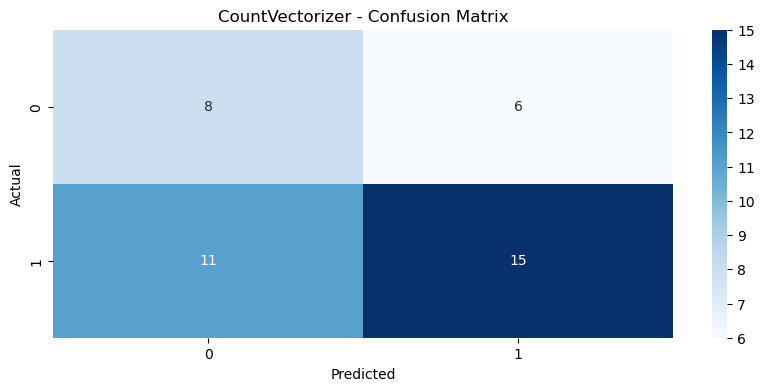

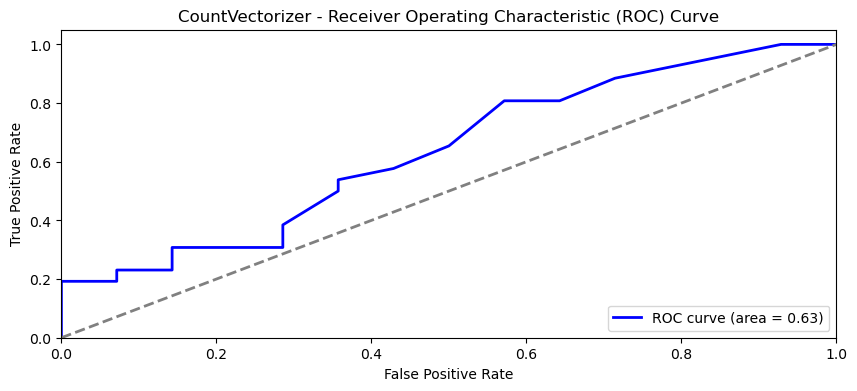


TfidfVectorizer Performance Metrics:
Accuracy: 0.62
Precision: 0.79
Recall: 0.58
F1 Score: 0.67


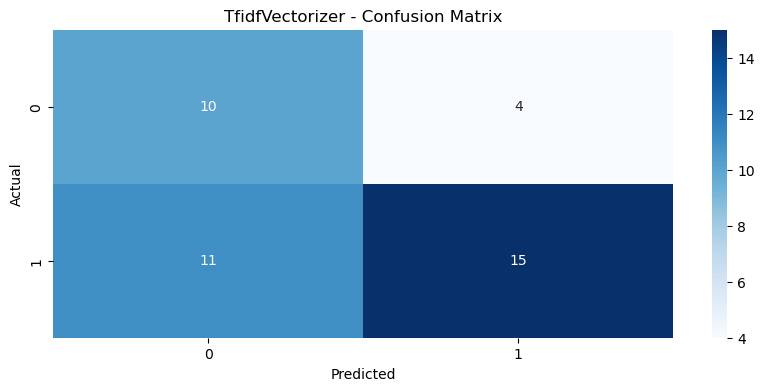

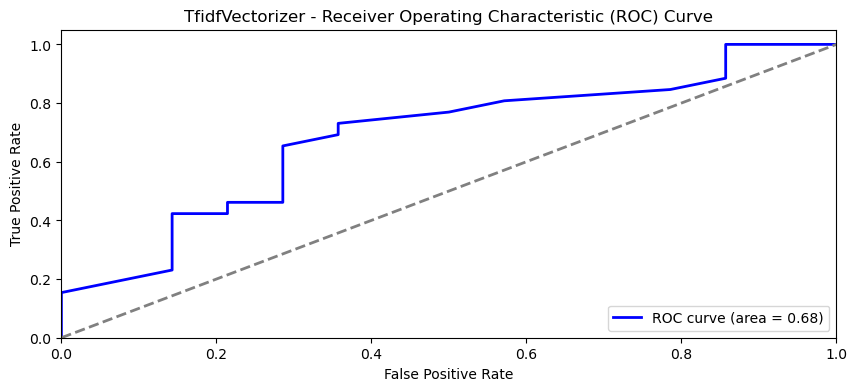

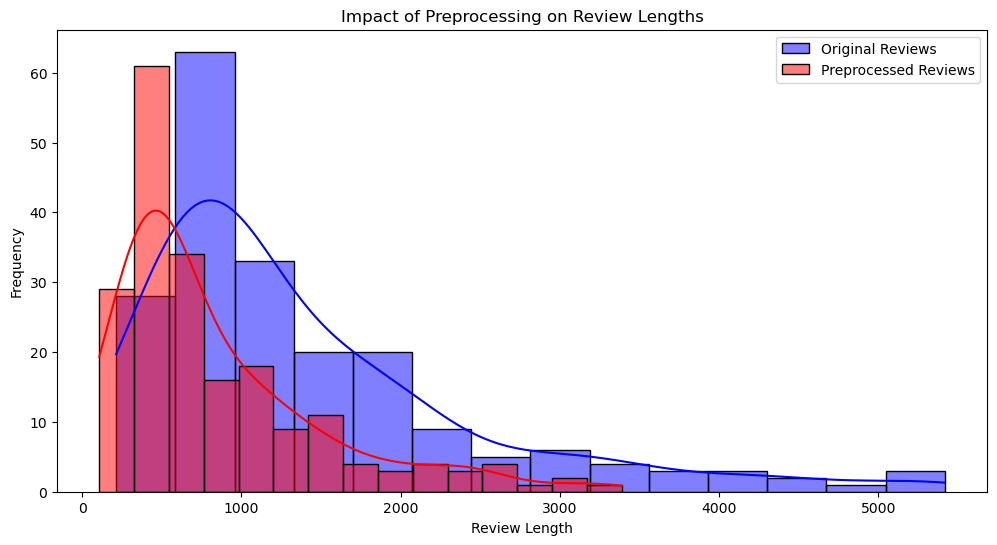

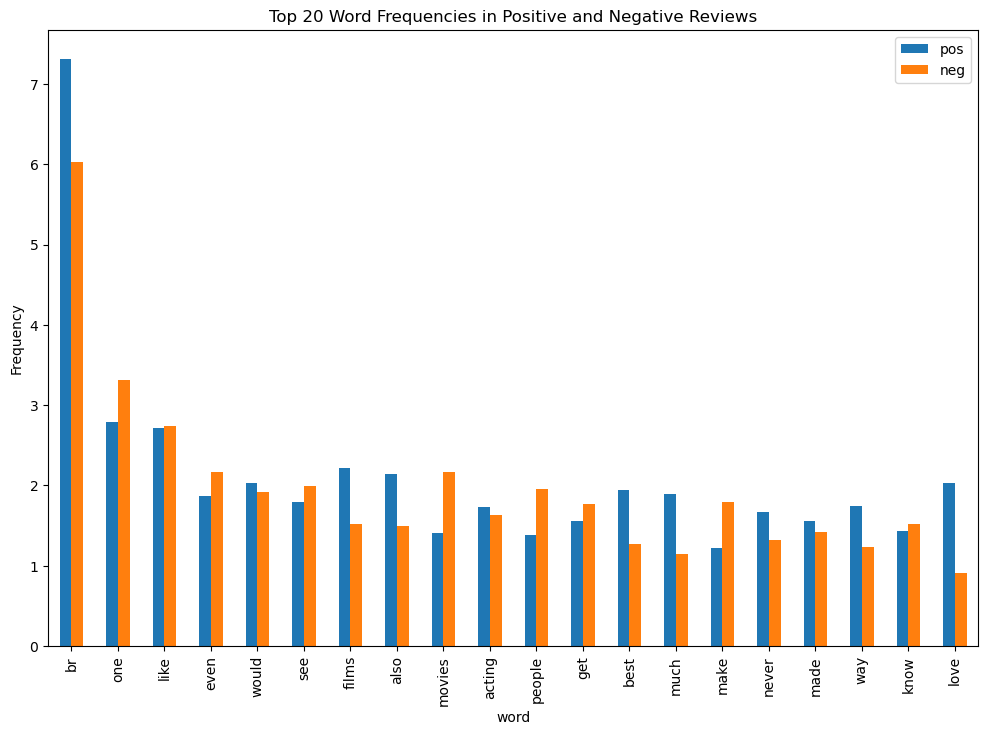


Misclassified Reviews Analysis:
Review: If you are like me and you bought the new Tenacious D album the day it came out, and went into the f...
True Label: 1, Predicted Label: 0
---
Review: I have seen this movie several times, it sure is one of the cheapest action flicks of the eighties. ...
True Label: 1, Predicted Label: 0
---
Review: There are many things to admire about this film, but the thing that got me above all others was the ...
True Label: 1, Predicted Label: 0
---
Review: The movie 'Heart of Darkness', based on the 1899 book by Joseph Conrad is one with little to no deta...
True Label: 1, Predicted Label: 0
---
Review: My qualifications for this review? I own all the Alien and Predator movies & I have and have read al...
True Label: 1, Predicted Label: 0
---
Review: No doubt about it. This is the animated short that put Uncle Walt on the map of success. When Walt's...
True Label: 1, Predicted Label: 0
---
Review: Everything about this movie is awful.<br /><br />You can te

In [70]:
if __name__ == "__main__":
    train_df, test_df = load_dataset()
    
    if train_df.empty:
        print("The DataFrame is empty.")
    else:
        train_df = train_df.sample(n=200, random_state=42)# Limit to 200 reviews for this task
    print(train_df)

    original_reviews = train_df['review'].tolist()
    preprocessed_reviews = [preprocess_text(review) for review in original_reviews]
    sentiments = train_df['sentiment'].tolist()
    
    print(f"Dataset loaded. Number of reviews: {len(original_reviews)}")
    print(f"Sample review: {reviews[0][:100]}...")  # Print first 100 characters of first review

    X_count, feature_names_count = extract_features(preprocessed_reviews, method='count')
    X_tfidf, feature_names_tfidf = extract_features(preprocessed_reviews, method='tfidf')

    X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, sentiments, test_size=0.2, random_state=42)
    X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, sentiments, test_size=0.2, random_state=42)

    model_count = train_model(X_train_count, y_train_count)
    model_tfidf = train_model(X_train_tfidf, y_train_tfidf)

    print("\nCountVectorizer Performance Metrics:")
    metrics_count = evaluate_model(model_count, X_test_count, y_test_count)
    visualize_model_performance(metrics_count, 'CountVectorizer')

    print("\nTfidfVectorizer Performance Metrics:")
    metrics_tfidf = evaluate_model(model_tfidf, X_test_tfidf, y_test_tfidf)
    visualize_model_performance(metrics_tfidf, 'TfidfVectorizer')

    visualize_impact_of_preprocessing(original_reviews, preprocessed_reviews)
    custom_visualization(feature_names_tfidf, X_tfidf, np.array(sentiments))

    reviews = train_df['review'].tolist()
    visualize_prediction_confidence(model_tfidf, X_test_tfidf, y_test_tfidf, reviews)

    print("\nMisclassified Reviews Analysis:")
    analyze_misclassified_reviews(model_tfidf, X_test_tfidf, y_test_tfidf, reviews)

In [ ]:
def train_model_with_tuning(X_train, y_train):
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=10000), param_grid, cv=5, scoring='f1')
    grid.fit(X_train, y_train)
    print(f"Best parameters found: {grid.best_params_}")
    return grid.best_estimator_

Best parameters found: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Evaluation with TFIDF after training model with hyperparameter tuning:
Accuracy: 0.775
Precision: 0.7428571428571429
Recall: 1.0
F1 Score: 0.8524590163934427
AUC Score: 0.9038461538461537


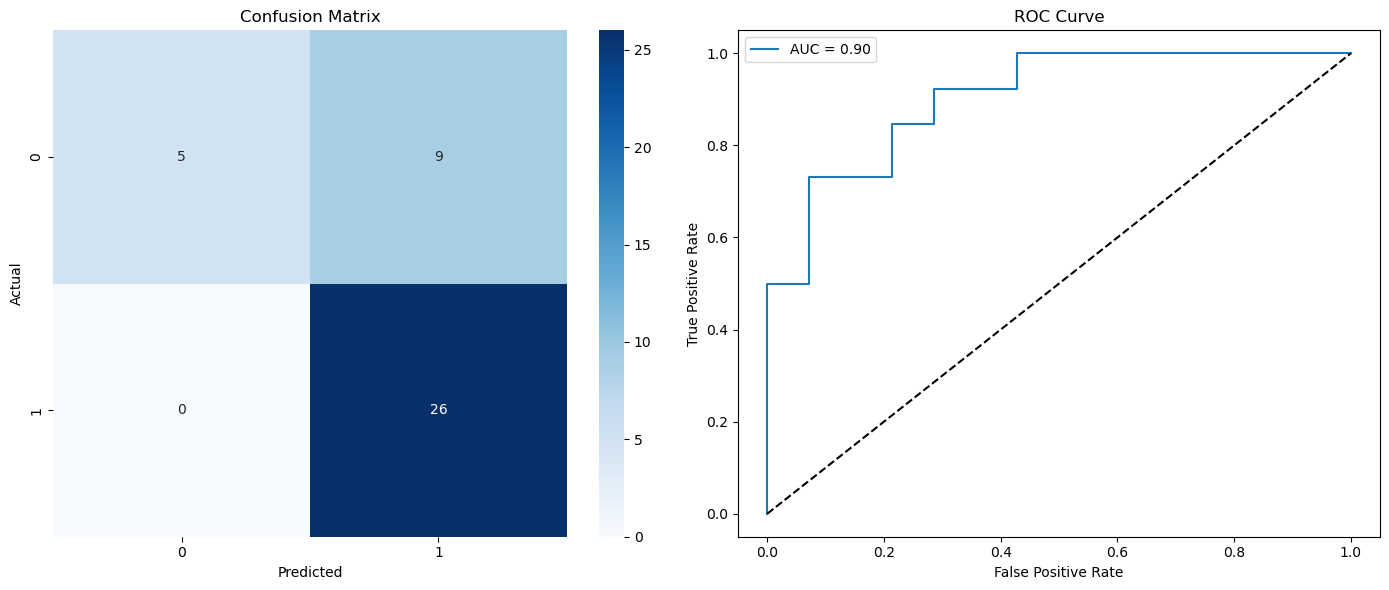

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    
    print(f"AUC Score: {auc_score}")
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

model_tfidf = train_model_with_tuning(X_train_tfidf, y_train_tfidf)
print("Evaluation with TFIDF after training model with hyperparameter tuning:")
evaluate_model(model_tfidf, X_test_tfidf, y_test_tfidf)